In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_10412\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

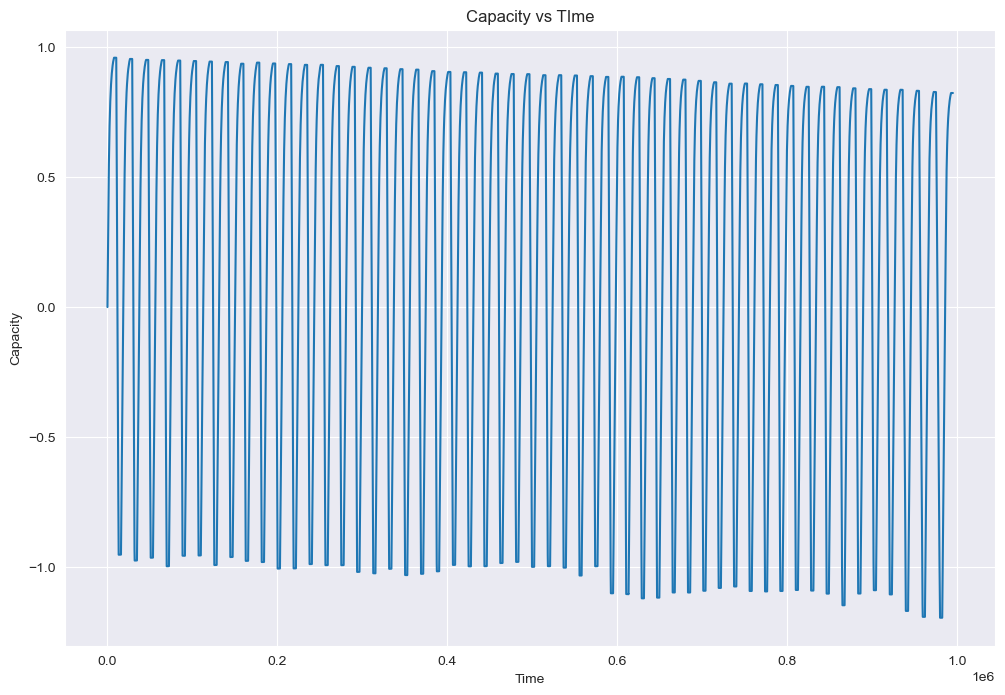

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [13]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

KeyboardInterrupt: 

In [14]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

NameError: name 'ilocs_max' is not defined

In [ ]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

In [15]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [16]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [17]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

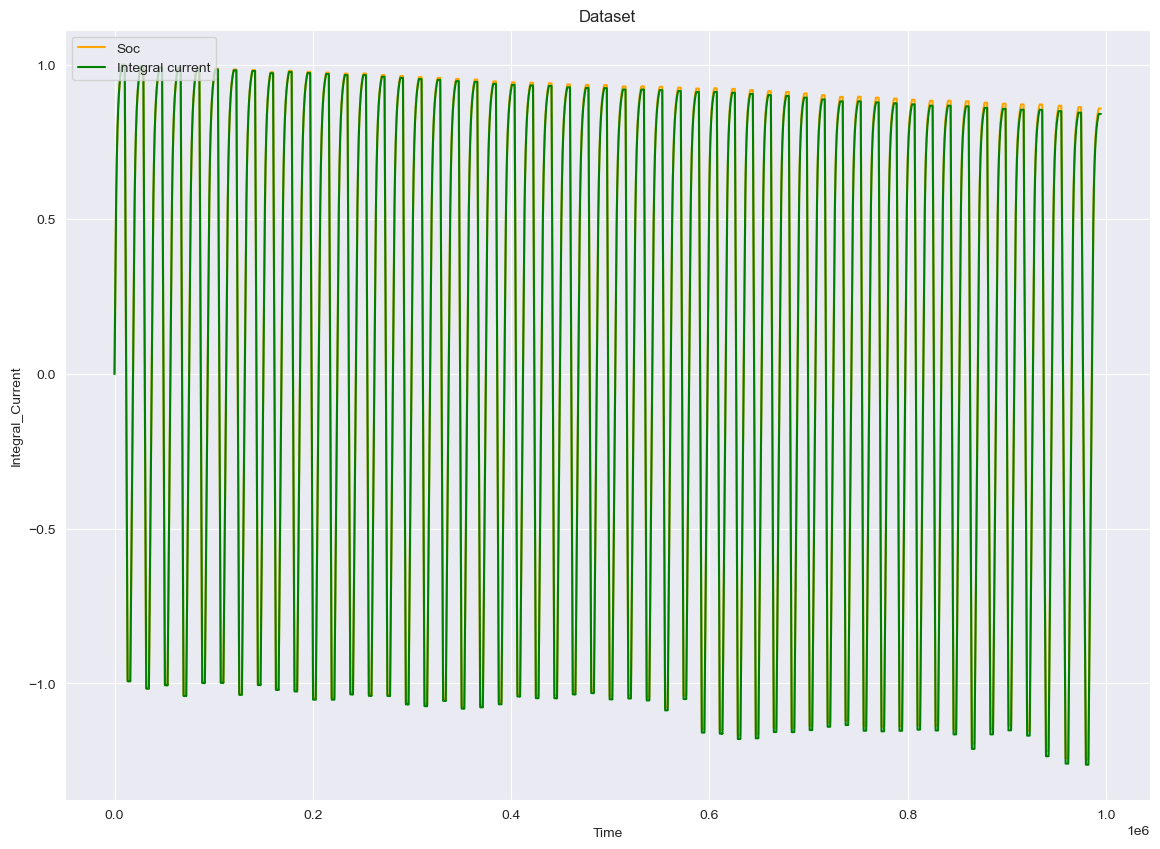

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [19]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [20]:
df.insert(loc = 5,column ='Energy',value=df['Integral_current']*df["Potential"]) # do add if needed 

In [21]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.786177,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2.992199,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4.550012,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2.255127,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1.844648,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.607332,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,4.196637,3453.550000,0.999371


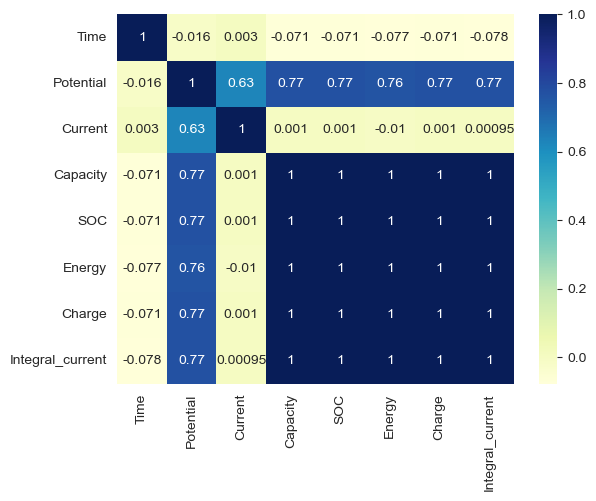

<Figure size 1400x1000 with 0 Axes>

In [22]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity','Charge','SOC','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [24]:
df.head()

,Time,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
0,0.000000e+00,0.822158,0.969868,0.554717,0.554717,0.000000,0.554717,0.558203
1,5.000005e-07,0.824159,0.969847,0.554823,0.554823,0.000712,0.554823,0.558283
2,1.500001e-06,0.826242,0.969850,0.554996,0.554996,0.002138,0.554996,0.558443
3,2.500002e-06,0.828049,0.969850,0.555148,0.555148,0.003566,0.555148,0.558602
4,3.500003e-06,0.829519,0.969850,0.555320,0.555320,0.004996,0.555320,0.558762


In [25]:
Y = df.pop('Energy')
X = df

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [27]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 7), (198976, 7), (795903,), (198976,))

In [28]:
X_train.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
722477,0.727547,0.691810,0.969643,0.150849,0.150849,0.150849,0.151147
845448,0.850540,0.291213,0.005388,0.287940,0.287940,0.287940,0.286440
119294,0.120314,0.999593,0.665283,0.986025,0.986025,0.986025,0.985028
500285,0.504752,0.496344,0.647200,0.090807,0.090807,0.090807,0.093476
681225,0.686283,0.442690,0.000292,0.608470,0.608470,0.608470,0.605653


In [29]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [32]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [33]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(80,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.1367 - rmse: 0.3105 - mae: 0.1367 - mse: 0.0964 - mape: 197.7207 - val_loss: 0.1192 - val_rmse: 0.2068 - val_mae: 0.1192 - val_mse: 0.0428 - val_mape: 28.4344
Epoch 2/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1136 - rmse: 0.2118 - mae: 0.1136 - mse: 0.0449 - mape: 157.4158 - val_loss: 0.1116 - val_rmse: 0.2101 - val_mae: 0.1116 - val_mse: 0.0441 - val_mape: 28.2654
Epoch 3/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1128 - rmse: 0.2119 - mae: 0.1128 - mse: 0.0449 - mape: 165.0609 - val_loss: 0.1114 - val_rmse: 0.2136 - val_mae: 0.1114 - val_mse: 0.0456 - val_mape: 29.1525
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1124 - rmse: 0.2120 - mae: 0.1124 - mse: 0.0449 - mape: 182.7365 - val_loss: 0.1123 - val_rmse: 0.2137 - val_mae: 0.1123 - val_mse: 0.0457 - val_mape: 29.0323
Epoch 5/100
6218/6218 [=====================

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1112 - rmse: 0.2123 - mae: 0.1112 - mse: 0.0451 - mape: 160.8324 - val_loss: 0.1113 - val_rmse: 0.2117 - val_mae: 0.1113 - val_mse: 0.0448 - val_mape: 28.8767
Epoch 36/100
6218/6218 [==============================] - 11s 2ms/step - loss: 0.1112 - rmse: 0.2123 - mae: 0.1112 - mse: 0.0451 - mape: 164.6907 - val_loss: 0.1115 - val_rmse: 0.2119 - val_mae: 0.1115 - val_mse: 0.0449 - val_mape: 28.8759
Epoch 37/100
6218/6218 [==============================] - 11s 2ms/step - loss: 0.1112 - rmse: 0.2123 - mae: 0.1112 - mse: 0.0451 - mape: 164.4575 - val_loss: 0.1114 - val_rmse: 0.2122 - val_mae: 0.1114 - val_mse: 0.0450 - val_mape: 29.1202
Epoch 37: early stopping
CPU times: total: 13min 5s
Wall time: 7min 50s


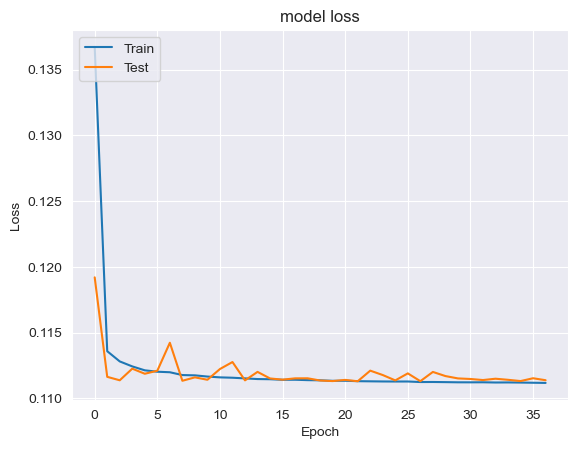

In [34]:
plot_his(history_1)

In [35]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 0.1114 - rmse: 0.2122 - mae: 0.1114 - mse: 0.0450 - mape: 29.1202


[0.11137934774160385,
 0.21219024062156677,
 0.11137934774160385,
 0.04502469673752785,
 29.12020492553711]

In [36]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 6s 963us/step


In [48]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 70)                560       
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [38]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  11477.363


# Model 2

In [39]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0139 - rmse: 0.1095 - mae: 0.0139 - mse: 0.0120 - mape: 22.5163 - val_loss: 0.0054 - val_rmse: 0.0084 - val_mae: 0.0054 - val_mse: 7.1214e-05 - val_mape: 0.8120
Epoch 2/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0041 - rmse: 0.0075 - mae: 0.0041 - mse: 5.6943e-05 - mape: 20.0779 - val_loss: 0.0036 - val_rmse: 0.0070 - val_mae: 0.0036 - val_mse: 4.8436e-05 - val_mape: 0.5537
Epoch 3/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0036 - rmse: 0.0066 - mae: 0.0036 - mse: 4.3894e-05 - mape: 22.3985 - val_loss: 0.0034 - val_rmse: 0.0059 - val_mae: 0.0034 - val_mse: 3.4723e-05 - val_mape: 0.5308
Epoch 4/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0033 - rmse: 0.0056 - mae: 0.0033 - mse: 3.1809e-05 - mape: 23.7251 - val_loss: 0.0032 - val_rmse: 0.0055 - val_mae: 0.0032 - val_mse: 3.0224e-05 - val_mape: 0.4682
Epoch 5/100
2487

24872/24872 [==============================] - 41s 2ms/step - loss: 0.0023 - rmse: 0.0041 - mae: 0.0023 - mse: 1.6708e-05 - mape: 28.8927 - val_loss: 0.0023 - val_rmse: 0.0041 - val_mae: 0.0023 - val_mse: 1.6457e-05 - val_mape: 0.5532
Epoch 35/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0023 - rmse: 0.0041 - mae: 0.0023 - mse: 1.6596e-05 - mape: 29.6255 - val_loss: 0.0023 - val_rmse: 0.0040 - val_mae: 0.0023 - val_mse: 1.6366e-05 - val_mape: 0.5554
Epoch 36/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0023 - rmse: 0.0041 - mae: 0.0023 - mse: 1.6483e-05 - mape: 29.3990 - val_loss: 0.0023 - val_rmse: 0.0040 - val_mae: 0.0023 - val_mse: 1.6144e-05 - val_mape: 0.5617
Epoch 37/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0023 - rmse: 0.0040 - mae: 0.0023 - mse: 1.6372e-05 - mape: 29.1046 - val_loss: 0.0023 - val_rmse: 0.0040 - val_mae: 0.0023 - val_mse: 1.6012e-05 - val_mape: 0.5663
Epoch 38/100
24872/24

24872/24872 [==============================] - 45s 2ms/step - loss: 0.0021 - rmse: 0.0038 - mae: 0.0021 - mse: 1.4356e-05 - mape: 29.7260 - val_loss: 0.0022 - val_rmse: 0.0037 - val_mae: 0.0022 - val_mse: 1.4050e-05 - val_mape: 0.5325
Epoch 68/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.0021 - rmse: 0.0038 - mae: 0.0021 - mse: 1.4301e-05 - mape: 29.6443 - val_loss: 0.0021 - val_rmse: 0.0037 - val_mae: 0.0021 - val_mse: 1.3994e-05 - val_mape: 0.5107
Epoch 69/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0021 - rmse: 0.0038 - mae: 0.0021 - mse: 1.4269e-05 - mape: 29.6611 - val_loss: 0.0021 - val_rmse: 0.0037 - val_mae: 0.0021 - val_mse: 1.3935e-05 - val_mape: 0.5135
Epoch 70/100
24872/24872 [==============================] - 41s 2ms/step - loss: 0.0021 - rmse: 0.0038 - mae: 0.0021 - mse: 1.4212e-05 - mape: 29.7414 - val_loss: 0.0021 - val_rmse: 0.0037 - val_mae: 0.0021 - val_mse: 1.4016e-05 - val_mape: 0.5028
Epoch 71/100
24872/24

24872/24872 [==============================] - 55s 2ms/step - loss: 0.0021 - rmse: 0.0036 - mae: 0.0021 - mse: 1.3099e-05 - mape: 29.1791 - val_loss: 0.0020 - val_rmse: 0.0036 - val_mae: 0.0020 - val_mse: 1.2853e-05 - val_mape: 0.4579
CPU times: total: 1h 59min 9s
Wall time: 1h 15min 23s


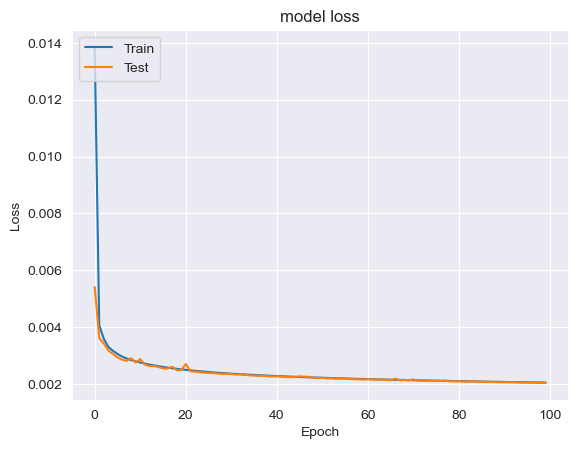

In [40]:
plot_his(history_2)

In [41]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0020 - rmse: 0.0036 - mae: 0.0020 - mse: 1.2853e-05 - mape: 0.4579


[0.0020382318180054426,
 0.003585159545764327,
 0.0020382318180054426,
 1.2853369298682082e-05,
 0.45788559317588806]

In [42]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [43]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11817.265


# Model 3

In [44]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 16s 2ms/step - loss: 0.0475 - rmse: 0.2598 - mae: 0.0475 - mse: 0.0675 - mape: 60.5959 - val_loss: 0.0147 - val_rmse: 0.0197 - val_mae: 0.0147 - val_mse: 3.8641e-04 - val_mape: 2.6378
Epoch 2/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0131 - rmse: 0.0187 - mae: 0.0131 - mse: 3.5079e-04 - mape: 6.9190 - val_loss: 0.0118 - val_rmse: 0.0165 - val_mae: 0.0118 - val_mse: 2.7140e-04 - val_mape: 2.1912
Epoch 3/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0111 - rmse: 0.0165 - mae: 0.0111 - mse: 2.7237e-04 - mape: 25.2563 - val_loss: 0.0150 - val_rmse: 0.0191 - val_mae: 0.0150 - val_mse: 3.6613e-04 - val_mape: 1.7629
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0101 - rmse: 0.0154 - mae: 0.0101 - mse: 2.3808e-04 - mape: 63.3218 - val_loss: 0.0106 - val_rmse: 0.0156 - val_mae: 0.0106 - val_mse: 2.4420e-04 - val_mape: 1.2876
Epoch 5/100
6218/6218 [==

6218/6218 [==============================] - 15s 2ms/step - loss: 0.0055 - rmse: 0.0104 - mae: 0.0055 - mse: 1.0840e-04 - mape: 19.8121 - val_loss: 0.0053 - val_rmse: 0.0103 - val_mae: 0.0053 - val_mse: 1.0655e-04 - val_mape: 1.2986
Epoch 35/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0054 - rmse: 0.0104 - mae: 0.0054 - mse: 1.0771e-04 - mape: 15.9052 - val_loss: 0.0053 - val_rmse: 0.0105 - val_mae: 0.0053 - val_mse: 1.0938e-04 - val_mape: 1.1311
Epoch 36/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0054 - rmse: 0.0103 - mae: 0.0054 - mse: 1.0701e-04 - mape: 16.9553 - val_loss: 0.0054 - val_rmse: 0.0105 - val_mae: 0.0054 - val_mse: 1.1027e-04 - val_mape: 1.1887
Epoch 37/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0054 - rmse: 0.0103 - mae: 0.0054 - mse: 1.0653e-04 - mape: 12.5020 - val_loss: 0.0053 - val_rmse: 0.0103 - val_mae: 0.0053 - val_mse: 1.0685e-04 - val_mape: 1.1851
Epoch 38/100
6218/6218 [=====

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0051 - rmse: 0.0108 - mae: 0.0051 - mse: 1.1765e-04 - mape: 10.3293 - val_loss: 0.0055 - val_rmse: 0.0110 - val_mae: 0.0055 - val_mse: 1.2016e-04 - val_mape: 1.2855
Epoch 68/100
6218/6218 [==============================] - 13s 2ms/step - loss: 0.0051 - rmse: 0.0109 - mae: 0.0051 - mse: 1.1773e-04 - mape: 12.4337 - val_loss: 0.0051 - val_rmse: 0.0110 - val_mae: 0.0051 - val_mse: 1.2092e-04 - val_mape: 1.1897
Epoch 69/100
6218/6218 [==============================] - 12s 2ms/step - loss: 0.0050 - rmse: 0.0109 - mae: 0.0050 - mse: 1.1778e-04 - mape: 11.8587 - val_loss: 0.0050 - val_rmse: 0.0110 - val_mae: 0.0050 - val_mse: 1.2106e-04 - val_mape: 1.1585
Epoch 70/100
6218/6218 [==============================] - 13s 2ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1768e-04 - mape: 12.9359 - val_loss: 0.0052 - val_rmse: 0.0109 - val_mae: 0.0052 - val_mse: 1.1980e-04 - val_mape: 1.2638
Epoch 71/100
6218/6218 [=====

6218/6218 [==============================] - 15s 2ms/step - loss: 0.0045 - rmse: 0.0106 - mae: 0.0045 - mse: 1.1166e-04 - mape: 28.9672 - val_loss: 0.0046 - val_rmse: 0.0107 - val_mae: 0.0046 - val_mse: 1.1385e-04 - val_mape: 1.0568
CPU times: total: 40min 9s
Wall time: 25min 10s


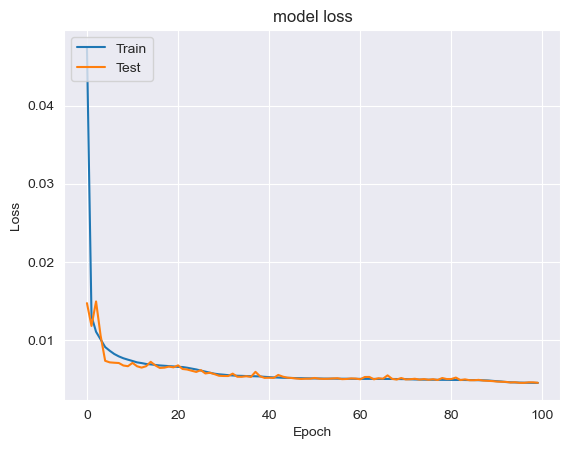

In [45]:
plot_his(history_3)

In [46]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0046 - rmse: 0.0107 - mae: 0.0046 - mse: 1.1385e-04 - mape: 1.0568


[0.0045677004382014275,
 0.010670014657080173,
 0.0045677004382014275,
 0.00011384921526769176,
 1.0568499565124512]

In [47]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [48]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9277.266


# Model 4

In [49]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0205 - rmse: 0.1032 - mae: 0.0205 - mse: 0.0107 - mape: 17.5749 - val_loss: 0.0099 - val_rmse: 0.0182 - val_mae: 0.0099 - val_mse: 3.3265e-04 - val_mape: 1.5185
Epoch 2/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0098 - rmse: 0.0173 - mae: 0.0098 - mse: 2.9791e-04 - mape: 3.2119 - val_loss: 0.0091 - val_rmse: 0.0168 - val_mae: 0.0091 - val_mse: 2.8293e-04 - val_mape: 1.3953
Epoch 3/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0087 - rmse: 0.0159 - mae: 0.0087 - mse: 2.5341e-04 - mape: 4.3383 - val_loss: 0.0080 - val_rmse: 0.0153 - val_mae: 0.0080 - val_mse: 2.3529e-04 - val_mape: 1.4460
Epoch 4/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0080 - rmse: 0.0148 - mae: 0.0080 - mse: 2.2004e-04 - mape: 12.4386 - val_loss: 0.0077 - val_rmse: 0.0146 - val_mae: 0.0077 - val_mse: 2.1430e-04 - val_mape: 1.6109
Epoch 5/100
24872/

24872/24872 [==============================] - 66s 3ms/step - loss: 0.0055 - rmse: 0.0112 - mae: 0.0055 - mse: 1.2654e-04 - mape: 3.9244 - val_loss: 0.0055 - val_rmse: 0.0113 - val_mae: 0.0055 - val_mse: 1.2732e-04 - val_mape: 1.2296
Epoch 35/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0055 - rmse: 0.0112 - mae: 0.0055 - mse: 1.2615e-04 - mape: 4.6602 - val_loss: 0.0055 - val_rmse: 0.0113 - val_mae: 0.0055 - val_mse: 1.2694e-04 - val_mape: 1.1601
Epoch 36/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0054 - rmse: 0.0112 - mae: 0.0054 - mse: 1.2580e-04 - mape: 5.1935 - val_loss: 0.0055 - val_rmse: 0.0113 - val_mae: 0.0055 - val_mse: 1.2720e-04 - val_mape: 1.2264
Epoch 37/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0054 - rmse: 0.0112 - mae: 0.0054 - mse: 1.2546e-04 - mape: 4.7592 - val_loss: 0.0054 - val_rmse: 0.0112 - val_mae: 0.0054 - val_mse: 1.2553e-04 - val_mape: 1.1463
Epoch 38/100
24872/24872 

24872/24872 [==============================] - 56s 2ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1726e-04 - mape: 5.7836 - val_loss: 0.0050 - val_rmse: 0.0108 - val_mae: 0.0050 - val_mse: 1.1683e-04 - val_mape: 0.9292
Epoch 68/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1689e-04 - mape: 5.7856 - val_loss: 0.0050 - val_rmse: 0.0108 - val_mae: 0.0050 - val_mse: 1.1611e-04 - val_mape: 0.9415
Epoch 69/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1646e-04 - mape: 6.1449 - val_loss: 0.0050 - val_rmse: 0.0108 - val_mae: 0.0050 - val_mse: 1.1608e-04 - val_mape: 0.9458
Epoch 70/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1611e-04 - mape: 6.5267 - val_loss: 0.0049 - val_rmse: 0.0107 - val_mae: 0.0049 - val_mse: 1.1533e-04 - val_mape: 0.9245
Epoch 71/100
24872/24872 

24872/24872 [==============================] - 47s 2ms/step - loss: 0.0047 - rmse: 0.0102 - mae: 0.0047 - mse: 1.0345e-04 - mape: 4.8793 - val_loss: 0.0047 - val_rmse: 0.0102 - val_mae: 0.0047 - val_mse: 1.0365e-04 - val_mape: 0.7582
CPU times: total: 2h 28min 7s
Wall time: 1h 32min 17s


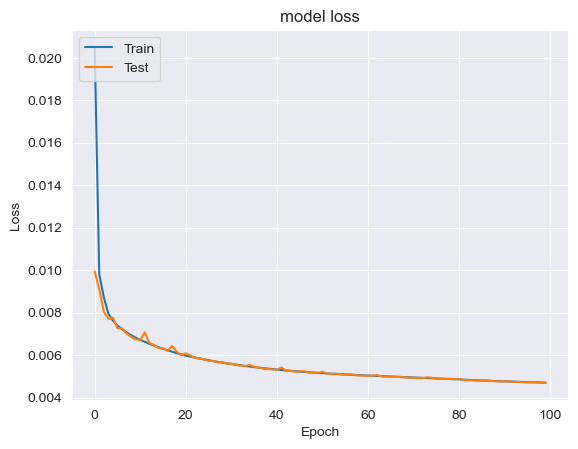

In [50]:
plot_his(history_4)

In [51]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.0047 - rmse: 0.0102 - mae: 0.0047 - mse: 1.0365e-04 - mape: 0.7582


[0.0046918075531721115,
 0.010180681943893433,
 0.0046918075531721115,
 0.00010364627814851701,
 0.7582085132598877]

In [52]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 6s 984us/step


In [53]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  9277.266


# Model 5

In [54]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 195s 8ms/step - loss: 0.0549 - rmse: 0.2314 - mae: 0.0549 - mse: 0.0536 - mape: 50.6494 - val_loss: 0.0173 - val_rmse: 0.0214 - val_mae: 0.0173 - val_mse: 4.5737e-04 - val_mape: 1.1795
Epoch 2/50
24872/24872 [==============================] - 191s 8ms/step - loss: 0.0124 - rmse: 0.0183 - mae: 0.0124 - mse: 3.3473e-04 - mape: 14.5184 - val_loss: 0.0122 - val_rmse: 0.0164 - val_mae: 0.0122 - val_mse: 2.6755e-04 - val_mape: 1.8019
Epoch 3/50
24872/24872 [==============================] - 211s 8ms/step - loss: 0.0095 - rmse: 0.0153 - mae: 0.0095 - mse: 2.3554e-04 - mape: 10.0823 - val_loss: 0.0112 - val_rmse: 0.0154 - val_mae: 0.0112 - val_mse: 2.3621e-04 - val_mape: 1.5419
Epoch 4/50
24872/24872 [==============================] - 192s 8ms/step - loss: 0.0083 - rmse: 0.0142 - mae: 0.0083 - mse: 2.0065e-04 - mape: 8.3376 - val_loss: 0.0080 - val_rmse: 0.0134 - val_mae: 0.0080 - val_mse: 1.7901e-04 - val_mape: 1.1300
Epoch 5/50
24872/

24872/24872 [==============================] - 197s 8ms/step - loss: 0.0036 - rmse: 0.0061 - mae: 0.0036 - mse: 3.7406e-05 - mape: 8.7024 - val_loss: 0.0033 - val_rmse: 0.0059 - val_mae: 0.0033 - val_mse: 3.5148e-05 - val_mape: 0.5106
Epoch 35/50
24872/24872 [==============================] - 222s 9ms/step - loss: 0.0035 - rmse: 0.0060 - mae: 0.0035 - mse: 3.5811e-05 - mape: 9.8313 - val_loss: 0.0033 - val_rmse: 0.0060 - val_mae: 0.0033 - val_mse: 3.5687e-05 - val_mape: 0.5225
Epoch 36/50
24872/24872 [==============================] - 210s 8ms/step - loss: 0.0034 - rmse: 0.0059 - mae: 0.0034 - mse: 3.4421e-05 - mape: 8.7224 - val_loss: 0.0035 - val_rmse: 0.0058 - val_mae: 0.0035 - val_mse: 3.3569e-05 - val_mape: 0.5663
Epoch 37/50
24872/24872 [==============================] - 223s 9ms/step - loss: 0.0034 - rmse: 0.0058 - mae: 0.0034 - mse: 3.3158e-05 - mape: 11.2264 - val_loss: 0.0032 - val_rmse: 0.0056 - val_mae: 0.0032 - val_mse: 3.1315e-05 - val_mape: 0.5161
Epoch 38/50
24872/24872

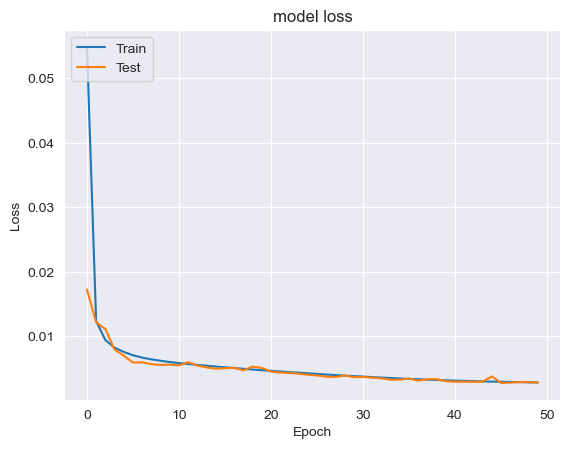

In [55]:
plot_his(history_5)

In [56]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 0.0029 - rmse: 0.0050 - mae: 0.0029 - mse: 2.5410e-05 - mape: 0.4783


[0.0028707876335829496,
 0.005040791817009449,
 0.0028707876335829496,
 2.54095812124433e-05,
 0.47831228375434875]

In [57]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [60]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25717.273


# Model 6

In [61]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 226s 9ms/step - loss: 0.0425 - rmse: 0.1852 - mae: 0.0425 - mse: 0.0343 - mape: 39.1842 - val_loss: 0.0158 - val_rmse: 0.0200 - val_mae: 0.0158 - val_mse: 4.0137e-04 - val_mape: 2.3330
Epoch 2/40
24872/24872 [==============================] - 218s 9ms/step - loss: 0.0106 - rmse: 0.0165 - mae: 0.0106 - mse: 2.7364e-04 - mape: 18.1273 - val_loss: 0.0104 - val_rmse: 0.0159 - val_mae: 0.0104 - val_mse: 2.5297e-04 - val_mape: 1.1307
Epoch 3/40
24872/24872 [==============================] - 218s 9ms/step - loss: 0.0080 - rmse: 0.0140 - mae: 0.0080 - mse: 1.9537e-04 - mape: 11.0186 - val_loss: 0.0074 - val_rmse: 0.0131 - val_mae: 0.0074 - val_mse: 1.7153e-04 - val_mape: 0.6632
Epoch 4/40
24872/24872 [==============================] - 216s 9ms/step - loss: 0.0068 - rmse: 0.0127 - mae: 0.0068 - mse: 1.6228e-04 - mape: 13.6207 - val_loss: 0.0060 - val_rmse: 0.0120 - val_mae: 0.0060 - val_mse: 1.4290e-04 - val_mape: 0.7966
Epoch 5/40
24872

24872/24872 [==============================] - 227s 9ms/step - loss: 0.0029 - rmse: 0.0052 - mae: 0.0029 - mse: 2.7434e-05 - mape: 7.5092 - val_loss: 0.0028 - val_rmse: 0.0052 - val_mae: 0.0028 - val_mse: 2.7474e-05 - val_mape: 0.4220
Epoch 35/40
24872/24872 [==============================] - 226s 9ms/step - loss: 0.0029 - rmse: 0.0052 - mae: 0.0029 - mse: 2.7001e-05 - mape: 6.4933 - val_loss: 0.0028 - val_rmse: 0.0051 - val_mae: 0.0028 - val_mse: 2.5953e-05 - val_mape: 0.3661
Epoch 36/40
24872/24872 [==============================] - 224s 9ms/step - loss: 0.0029 - rmse: 0.0052 - mae: 0.0029 - mse: 2.6652e-05 - mape: 9.0694 - val_loss: 0.0027 - val_rmse: 0.0051 - val_mae: 0.0027 - val_mse: 2.5953e-05 - val_mape: 0.3907
Epoch 37/40
24872/24872 [==============================] - 224s 9ms/step - loss: 0.0029 - rmse: 0.0051 - mae: 0.0029 - mse: 2.6290e-05 - mape: 5.9734 - val_loss: 0.0030 - val_rmse: 0.0052 - val_mae: 0.0030 - val_mse: 2.6911e-05 - val_mape: 0.4242
Epoch 38/40
24872/24872 

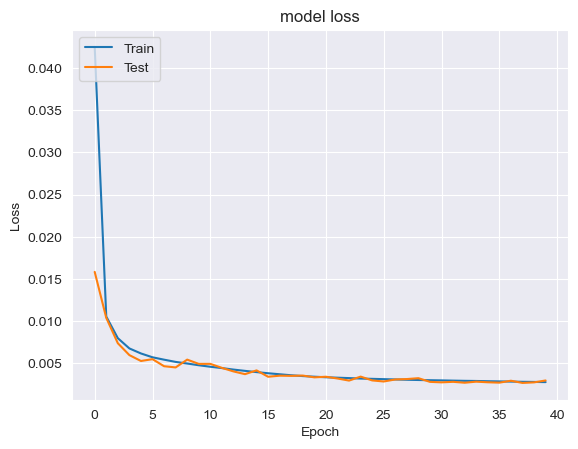

In [62]:
plot_his(history_6)

In [63]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 24s 4ms/step - loss: 0.0030 - rmse: 0.0052 - mae: 0.0030 - mse: 2.7049e-05 - mape: 0.4302


[0.0029862395022064447,
 0.00520083075389266,
 0.0029862395022064447,
 2.7048639822169207e-05,
 0.4302329421043396]

In [64]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [65]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 22s 3ms/step


In [66]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65857.266


# Model 7

In [67]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.1263 - rmse: 0.3717 - mae: 0.1263 - mse: 0.1382 - mape: 108.6317 - val_loss: 0.0795 - val_rmse: 0.0886 - val_mae: 0.0795 - val_mse: 0.0078 - val_mape: 10.3566
Epoch 2/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0301 - rmse: 0.0386 - mae: 0.0301 - mse: 0.0015 - mape: 20.1521 - val_loss: 0.0474 - val_rmse: 0.0502 - val_mae: 0.0474 - val_mse: 0.0025 - val_mape: 6.4354
Epoch 3/70
6218/6218 [==============================] - 57s 9ms/step - loss: 0.0199 - rmse: 0.0265 - mae: 0.0199 - mse: 7.0204e-04 - mape: 19.6422 - val_loss: 0.0097 - val_rmse: 0.0156 - val_mae: 0.0097 - val_mse: 2.4349e-04 - val_mape: 1.0912
Epoch 4/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0163 - rmse: 0.0224 - mae: 0.0163 - mse: 5.0237e-04 - mape: 12.7190 - val_loss: 0.0138 - val_rmse: 0.0186 - val_mae: 0.0138 - val_mse: 3.4427e-04 - val_mape: 1.6750
Epoch 5/70
6218/6218 [================

Epoch 35/70
6218/6218 [==============================] - 57s 9ms/step - loss: 0.0064 - rmse: 0.0130 - mae: 0.0064 - mse: 1.7014e-04 - mape: 5.1551 - val_loss: 0.0062 - val_rmse: 0.0131 - val_mae: 0.0062 - val_mse: 1.7142e-04 - val_mape: 0.7054
Epoch 36/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0064 - rmse: 0.0130 - mae: 0.0064 - mse: 1.6964e-04 - mape: 5.1106 - val_loss: 0.0061 - val_rmse: 0.0129 - val_mae: 0.0061 - val_mse: 1.6628e-04 - val_mape: 0.6962
Epoch 37/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0063 - rmse: 0.0130 - mae: 0.0063 - mse: 1.6904e-04 - mape: 9.8073 - val_loss: 0.0059 - val_rmse: 0.0128 - val_mae: 0.0059 - val_mse: 1.6375e-04 - val_mape: 0.6621
Epoch 38/70
6218/6218 [==============================] - 59s 9ms/step - loss: 0.0063 - rmse: 0.0130 - mae: 0.0063 - mse: 1.6834e-04 - mape: 6.5836 - val_loss: 0.0060 - val_rmse: 0.0129 - val_mae: 0.0060 - val_mse: 1.6684e-04 - val_mape: 0.7349
Epoch 39/70
6218/6218 [=

6218/6218 [==============================] - 55s 9ms/step - loss: 0.0060 - rmse: 0.0126 - mae: 0.0060 - mse: 1.5926e-04 - mape: 4.1260 - val_loss: 0.0061 - val_rmse: 0.0125 - val_mae: 0.0061 - val_mse: 1.5720e-04 - val_mape: 0.6479
Epoch 69/70
6218/6218 [==============================] - 57s 9ms/step - loss: 0.0060 - rmse: 0.0126 - mae: 0.0060 - mse: 1.5904e-04 - mape: 6.4344 - val_loss: 0.0060 - val_rmse: 0.0126 - val_mae: 0.0060 - val_mse: 1.5904e-04 - val_mape: 0.6381
Epoch 70/70
6218/6218 [==============================] - 57s 9ms/step - loss: 0.0060 - rmse: 0.0126 - mae: 0.0060 - mse: 1.5896e-04 - mape: 5.9363 - val_loss: 0.0058 - val_rmse: 0.0125 - val_mae: 0.0058 - val_mse: 1.5561e-04 - val_mape: 0.6241
CPU times: total: 2h 58min 16s
Wall time: 1h 5min 26s


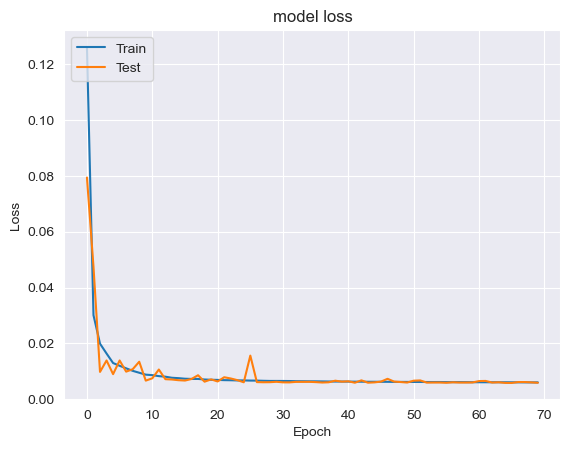

In [68]:
plot_his(history_7)

In [69]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [70]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 27s 4ms/step - loss: 0.0058 - rmse: 0.0125 - mae: 0.0058 - mse: 1.5561e-04 - mape: 0.6241


[0.005844945553690195,
 0.012474474497139454,
 0.005844945553690195,
 0.00015561252075713128,
 0.624092161655426]

In [71]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [72]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11217.269


# Model 8

In [73]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 136s 11ms/step - loss: 0.0539 - rmse: 0.2543 - mae: 0.0539 - mse: 0.0647 - mape: 17.4303 - val_loss: 0.0105 - val_rmse: 0.0168 - val_mae: 0.0105 - val_mse: 2.8264e-04 - val_mape: 1.4947
Epoch 2/40
12436/12436 [==============================] - 135s 11ms/step - loss: 0.0089 - rmse: 0.0159 - mae: 0.0089 - mse: 2.5187e-04 - mape: 6.7657 - val_loss: 0.0070 - val_rmse: 0.0148 - val_mae: 0.0070 - val_mse: 2.1999e-04 - val_mape: 0.7859
Epoch 3/40
12436/12436 [==============================] - 142s 11ms/step - loss: 0.0074 - rmse: 0.0148 - mae: 0.0074 - mse: 2.1966e-04 - mape: 1.5919 - val_loss: 0.0064 - val_rmse: 0.0139 - val_mae: 0.0064 - val_mse: 1.9191e-04 - val_mape: 0.7542
Epoch 4/40
12436/12436 [==============================] - 138s 11ms/step - loss: 0.0066 - rmse: 0.0137 - mae: 0.0066 - mse: 1.8745e-04 - mape: 2.0384 - val_loss: 0.0061 - val_rmse: 0.0132 - val_mae: 0.0061 - val_mse: 1.7460e-04 - val_mape: 0.7643
Epoch 5/40
1243

12436/12436 [==============================] - 141s 11ms/step - loss: 0.0051 - rmse: 0.0120 - mae: 0.0051 - mse: 1.4379e-04 - mape: 10.3828 - val_loss: 0.0051 - val_rmse: 0.0121 - val_mae: 0.0051 - val_mse: 1.4603e-04 - val_mape: 0.5598
Epoch 35/40
12436/12436 [==============================] - 140s 11ms/step - loss: 0.0051 - rmse: 0.0120 - mae: 0.0051 - mse: 1.4359e-04 - mape: 9.6585 - val_loss: 0.0051 - val_rmse: 0.0121 - val_mae: 0.0051 - val_mse: 1.4558e-04 - val_mape: 0.5688
Epoch 36/40
12436/12436 [==============================] - 143s 12ms/step - loss: 0.0051 - rmse: 0.0120 - mae: 0.0051 - mse: 1.4341e-04 - mape: 10.0721 - val_loss: 0.0052 - val_rmse: 0.0120 - val_mae: 0.0052 - val_mse: 1.4370e-04 - val_mape: 0.6709
Epoch 37/40
12436/12436 [==============================] - 146s 12ms/step - loss: 0.0051 - rmse: 0.0120 - mae: 0.0051 - mse: 1.4319e-04 - mape: 9.2870 - val_loss: 0.0051 - val_rmse: 0.0121 - val_mae: 0.0051 - val_mse: 1.4685e-04 - val_mape: 0.5499
Epoch 38/40
12436/

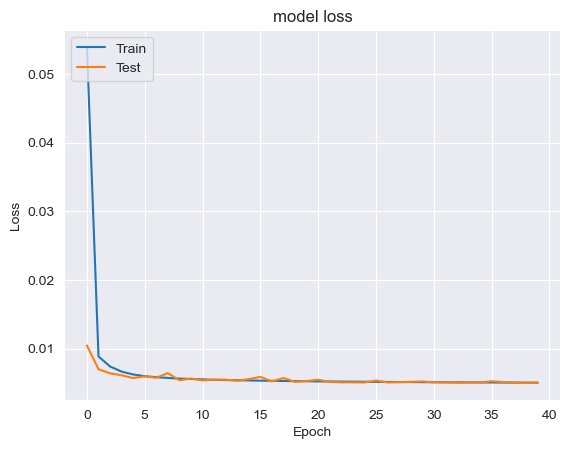

In [74]:
plot_his(history_8)

In [75]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 23s 4ms/step


In [76]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 25s 4ms/step - loss: 0.0050 - rmse: 0.0120 - mae: 0.0050 - mse: 1.4305e-04 - mape: 0.5629


[0.0050492617301642895,
 0.011960226111114025,
 0.0050492617301642895,
 0.00014304701471701264,
 0.5628663897514343]

In [77]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65857.266


# Model 9

In [78]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0246 - rmse: 0.1704 - mae: 0.0246 - mse: 0.0290 - mape: 12.9036 - val_loss: 0.0083 - val_rmse: 0.0129 - val_mae: 0.0083 - val_mse: 1.6555e-04 - val_mape: 1.5148
Epoch 2/50
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0073 - rmse: 0.0118 - mae: 0.0073 - mse: 1.3975e-04 - mape: 2.7193 - val_loss: 0.0066 - val_rmse: 0.0109 - val_mae: 0.0066 - val_mse: 1.1857e-04 - val_mape: 1.4346
Epoch 3/50
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0065 - rmse: 0.0107 - mae: 0.0065 - mse: 1.1430e-04 - mape: 10.0916 - val_loss: 0.0061 - val_rmse: 0.0102 - val_mae: 0.0061 - val_mse: 1.0355e-04 - val_mape: 1.7001
Epoch 4/50
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0061 - rmse: 0.0101 - mae: 0.0061 - mse: 1.0191e-04 - mape: 13.7518 - val_loss: 0.0060 - val_rmse: 0.0098 - val_mae: 0.0060 - val_mse: 9.5584e-05 - val_mape: 1.4222
Epoch 5/50
24872/2487

24872/24872 [==============================] - 78s 3ms/step - loss: 0.0047 - rmse: 0.0081 - mae: 0.0047 - mse: 6.5199e-05 - mape: 27.5768 - val_loss: 0.0046 - val_rmse: 0.0080 - val_mae: 0.0046 - val_mse: 6.3783e-05 - val_mape: 1.0710
Epoch 35/50
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0047 - rmse: 0.0081 - mae: 0.0047 - mse: 6.4813e-05 - mape: 26.3619 - val_loss: 0.0048 - val_rmse: 0.0080 - val_mae: 0.0048 - val_mse: 6.3879e-05 - val_mape: 1.0362
Epoch 36/50
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0046 - rmse: 0.0080 - mae: 0.0046 - mse: 6.4529e-05 - mape: 26.1521 - val_loss: 0.0046 - val_rmse: 0.0080 - val_mae: 0.0046 - val_mse: 6.3724e-05 - val_mape: 1.0725
Epoch 37/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0046 - rmse: 0.0080 - mae: 0.0046 - mse: 6.4338e-05 - mape: 27.1659 - val_loss: 0.0046 - val_rmse: 0.0079 - val_mae: 0.0046 - val_mse: 6.3163e-05 - val_mape: 1.0708
Epoch 38/50
24872/24872 

In [79]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0045 - rmse: 0.0078 - mae: 0.0045 - mse: 6.1066e-05 - mape: 1.0171


[0.004516570828855038,
 0.007814445532858372,
 0.004516570828855038,
 6.106555520091206e-05,
 1.0171465873718262]

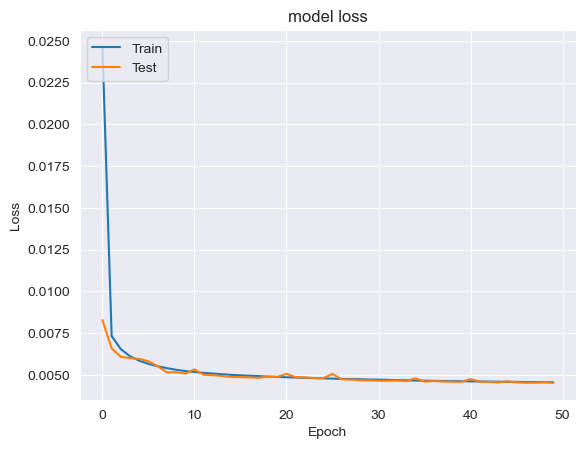

In [80]:
plot_his(history_9)

In [81]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [82]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  777.2656


# Model 10

In [83]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0266 - rmse: 0.1269 - mae: 0.0266 - mse: 0.0161 - mape: 87.0852 - val_loss: 0.0133 - val_rmse: 0.0192 - val_mae: 0.0133 - val_mse: 3.6782e-04 - val_mape: 1.6768
Epoch 2/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0086 - rmse: 0.0147 - mae: 0.0086 - mse: 2.1691e-04 - mape: 23.7353 - val_loss: 0.0092 - val_rmse: 0.0143 - val_mae: 0.0092 - val_mse: 2.0320e-04 - val_mape: 2.3028
Epoch 3/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0068 - rmse: 0.0124 - mae: 0.0068 - mse: 1.5389e-04 - mape: 33.5106 - val_loss: 0.0055 - val_rmse: 0.0111 - val_mae: 0.0055 - val_mse: 1.2403e-04 - val_mape: 1.7289
Epoch 4/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0061 - rmse: 0.0116 - mae: 0.0061 - mse: 1.3371e-04 - mape: 39.7113 - val_loss: 0.0052 - val_rmse: 0.0109 - val_mae: 0.0052 - val_mse: 1.1891e-04 - val_mape: 1.7370
Epoch 5/100
2487

24872/24872 [==============================] - 73s 3ms/step - loss: 0.0040 - rmse: 0.0088 - mae: 0.0040 - mse: 7.6569e-05 - mape: 23.6890 - val_loss: 0.0039 - val_rmse: 0.0086 - val_mae: 0.0039 - val_mse: 7.4141e-05 - val_mape: 0.8679
Epoch 35/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0040 - rmse: 0.0087 - mae: 0.0040 - mse: 7.5944e-05 - mape: 26.0427 - val_loss: 0.0041 - val_rmse: 0.0086 - val_mae: 0.0041 - val_mse: 7.3172e-05 - val_mape: 0.8365
Epoch 36/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0040 - rmse: 0.0087 - mae: 0.0040 - mse: 7.5184e-05 - mape: 22.1788 - val_loss: 0.0041 - val_rmse: 0.0086 - val_mae: 0.0041 - val_mse: 7.4053e-05 - val_mape: 0.9061
Epoch 37/100
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0039 - rmse: 0.0086 - mae: 0.0039 - mse: 7.4695e-05 - mape: 24.0718 - val_loss: 0.0038 - val_rmse: 0.0085 - val_mae: 0.0038 - val_mse: 7.2056e-05 - val_mape: 0.8133
Epoch 38/100
24872/24

24872/24872 [==============================] - 69s 3ms/step - loss: 0.0037 - rmse: 0.0079 - mae: 0.0037 - mse: 6.1878e-05 - mape: 21.9238 - val_loss: 0.0037 - val_rmse: 0.0078 - val_mae: 0.0037 - val_mse: 6.0276e-05 - val_mape: 0.7250
Epoch 68/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0037 - rmse: 0.0078 - mae: 0.0037 - mse: 6.1544e-05 - mape: 21.6222 - val_loss: 0.0036 - val_rmse: 0.0077 - val_mae: 0.0036 - val_mse: 5.9785e-05 - val_mape: 0.7535
Epoch 69/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0037 - rmse: 0.0078 - mae: 0.0037 - mse: 6.1287e-05 - mape: 21.6802 - val_loss: 0.0037 - val_rmse: 0.0077 - val_mae: 0.0037 - val_mse: 5.9868e-05 - val_mape: 0.7703
Epoch 70/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0037 - rmse: 0.0078 - mae: 0.0037 - mse: 6.0984e-05 - mape: 21.7517 - val_loss: 0.0036 - val_rmse: 0.0077 - val_mae: 0.0036 - val_mse: 5.9003e-05 - val_mape: 0.7282
Epoch 71/100
24872/24

24872/24872 [==============================] - 70s 3ms/step - loss: 0.0036 - rmse: 0.0074 - mae: 0.0036 - mse: 5.4429e-05 - mape: 20.4555 - val_loss: 0.0039 - val_rmse: 0.0074 - val_mae: 0.0039 - val_mse: 5.4795e-05 - val_mape: 0.7251
CPU times: total: 3h 12min 42s
Wall time: 2h 14s


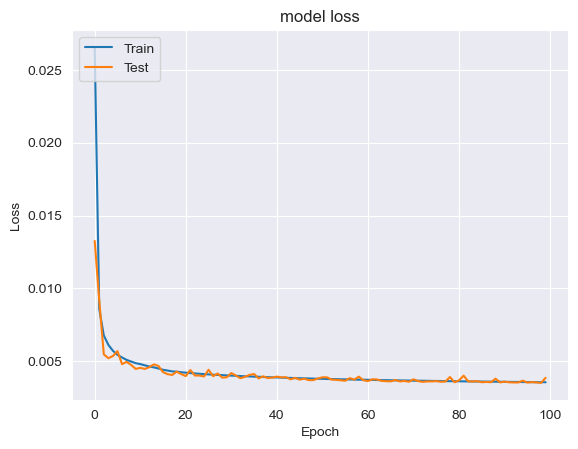

In [84]:
plot_his(history_10)

In [85]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0039 - rmse: 0.0074 - mae: 0.0039 - mse: 5.4795e-05 - mape: 0.7251


[0.0038697763811796904,
 0.007402364164590836,
 0.0038697763811796904,
 5.4794993047835305e-05,
 0.7251068949699402]

In [86]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [87]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2777.2693


# Model 11

In [88]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0461 - rmse: 0.2437 - mae: 0.0461 - mse: 0.0594 - mape: 44.2825 - val_loss: 0.0122 - val_rmse: 0.0271 - val_mae: 0.0122 - val_mse: 7.3267e-04 - val_mape: 2.4737
Epoch 2/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0114 - rmse: 0.0252 - mae: 0.0114 - mse: 6.3447e-04 - mape: 20.4529 - val_loss: 0.0108 - val_rmse: 0.0240 - val_mae: 0.0108 - val_mse: 5.7716e-04 - val_mape: 1.9468
Epoch 3/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0104 - rmse: 0.0231 - mae: 0.0104 - mse: 5.3345e-04 - mape: 20.0463 - val_loss: 0.0102 - val_rmse: 0.0225 - val_mae: 0.0102 - val_mse: 5.0628e-04 - val_mape: 1.7585
Epoch 4/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0099 - rmse: 0.0219 - mae: 0.0099 - mse: 4.7993e-04 - mape: 19.3043 - val_loss: 0.0097 - val_rmse: 0.0217 - val_mae: 0.0097 - val_mse: 4.6960e-04 - val_mape: 1.6617
Epoch 5/100
2487

24872/24872 [==============================] - 71s 3ms/step - loss: 0.0081 - rmse: 0.0174 - mae: 0.0081 - mse: 3.0252e-04 - mape: 15.0030 - val_loss: 0.0081 - val_rmse: 0.0174 - val_mae: 0.0081 - val_mse: 3.0241e-04 - val_mape: 1.1681
Epoch 35/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0080 - rmse: 0.0174 - mae: 0.0080 - mse: 3.0116e-04 - mape: 14.7593 - val_loss: 0.0081 - val_rmse: 0.0174 - val_mae: 0.0081 - val_mse: 3.0211e-04 - val_mape: 1.1425
Epoch 36/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0080 - rmse: 0.0173 - mae: 0.0080 - mse: 2.9981e-04 - mape: 14.8438 - val_loss: 0.0081 - val_rmse: 0.0173 - val_mae: 0.0081 - val_mse: 3.0028e-04 - val_mape: 1.1406
Epoch 37/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0080 - rmse: 0.0173 - mae: 0.0080 - mse: 2.9848e-04 - mape: 14.5545 - val_loss: 0.0080 - val_rmse: 0.0173 - val_mae: 0.0080 - val_mse: 2.9851e-04 - val_mape: 1.1387
Epoch 38/100
24872/24

24872/24872 [==============================] - 77s 3ms/step - loss: 0.0078 - rmse: 0.0166 - mae: 0.0078 - mse: 2.7539e-04 - mape: 12.0655 - val_loss: 0.0078 - val_rmse: 0.0166 - val_mae: 0.0078 - val_mse: 2.7486e-04 - val_mape: 0.9906
Epoch 68/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0078 - rmse: 0.0166 - mae: 0.0078 - mse: 2.7478e-04 - mape: 12.1482 - val_loss: 0.0078 - val_rmse: 0.0166 - val_mae: 0.0078 - val_mse: 2.7541e-04 - val_mape: 0.9905
Epoch 69/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0078 - rmse: 0.0166 - mae: 0.0078 - mse: 2.7426e-04 - mape: 12.1654 - val_loss: 0.0078 - val_rmse: 0.0166 - val_mae: 0.0078 - val_mse: 2.7484e-04 - val_mape: 0.9910
Epoch 70/100
24872/24872 [==============================] - 81s 3ms/step - loss: 0.0078 - rmse: 0.0165 - mae: 0.0078 - mse: 2.7384e-04 - mape: 12.1669 - val_loss: 0.0078 - val_rmse: 0.0166 - val_mae: 0.0078 - val_mse: 2.7395e-04 - val_mape: 0.9848
Epoch 71/100
24872/24

24872/24872 [==============================] - 77s 3ms/step - loss: 0.0076 - rmse: 0.0162 - mae: 0.0076 - mse: 2.6224e-04 - mape: 10.7855 - val_loss: 0.0077 - val_rmse: 0.0162 - val_mae: 0.0077 - val_mse: 2.6238e-04 - val_mape: 0.9640
CPU times: total: 3h 25min 12s
Wall time: 2h 4min 34s


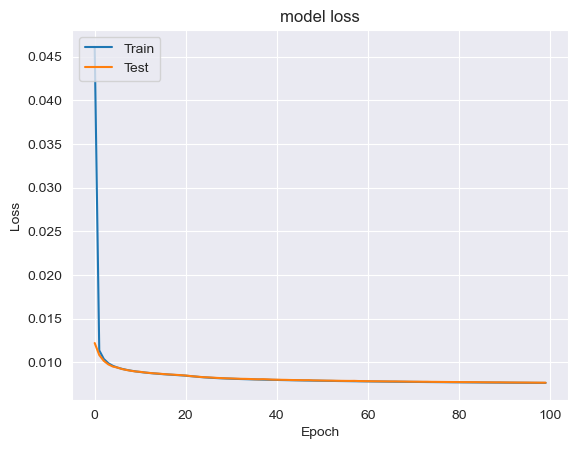

In [89]:
plot_his(history_11)

In [90]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0077 - rmse: 0.0162 - mae: 0.0077 - mse: 2.6238e-04 - mape: 0.9640


[0.007654707413166761,
 0.01619821786880493,
 0.007654707413166761,
 0.00026238226564601064,
 0.9639858603477478]

In [91]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [92]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  13777.27


# Model 12

In [93]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.1215 - rmse: 0.2512 - mae: 0.1215 - mse: 0.0631 - mape: 171.4410 - val_loss: 0.1119 - val_rmse: 0.2109 - val_mae: 0.1119 - val_mse: 0.0445 - val_mape: 28.4146
Epoch 2/100
24872/24872 [==============================] - 75s 3ms/step - loss: 0.1124 - rmse: 0.2121 - mae: 0.1124 - mse: 0.0450 - mape: 153.3586 - val_loss: 0.1117 - val_rmse: 0.2110 - val_mae: 0.1117 - val_mse: 0.0445 - val_mape: 28.2393
Epoch 3/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.1119 - rmse: 0.2122 - mae: 0.1119 - mse: 0.0450 - mape: 187.0386 - val_loss: 0.1139 - val_rmse: 0.2088 - val_mae: 0.1139 - val_mse: 0.0436 - val_mape: 28.1847
Epoch 4/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.1117 - rmse: 0.2122 - mae: 0.1117 - mse: 0.0450 - mape: 168.6896 - val_loss: 0.1114 - val_rmse: 0.2122 - val_mae: 0.1114 - val_mse: 0.0450 - val_mape: 29.0029
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 158.7310 - val_loss: 0.1113 - val_rmse: 0.2116 - val_mae: 0.1113 - val_mse: 0.0448 - val_mape: 28.7688
Epoch 36/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.1110 - rmse: 0.2123 - mae: 0.1110 - mse: 0.0451 - mape: 164.3123 - val_loss: 0.1114 - val_rmse: 0.2125 - val_mae: 0.1114 - val_mse: 0.0451 - val_mape: 28.9677
Epoch 37/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 162.8885 - val_loss: 0.1113 - val_rmse: 0.2130 - val_mae: 0.1113 - val_mse: 0.0454 - val_mape: 29.1884
Epoch 38/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 160.7218 - val_loss: 0.1113 - val_rmse: 0.2129 - val_mae: 0.1113 - val_mse: 0.0453 - val_mape: 29.1639
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.1110 - rmse: 0.2123 - mae: 0.1110 - mse: 0.0451 - mape: 166.3642 - val_loss: 0.1113 - val_rmse: 0.2126 - val_mae: 0.1113 - val_mse: 0.0452 - val_mape: 29.0295
Epoch 70/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 171.0657 - val_loss: 0.1113 - val_rmse: 0.2128 - val_mae: 0.1113 - val_mse: 0.0453 - val_mape: 29.1423
Epoch 71/100
24872/24872 [==============================] - 87s 4ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 165.6320 - val_loss: 0.1113 - val_rmse: 0.2131 - val_mae: 0.1113 - val_mse: 0.0454 - val_mape: 29.3008
Epoch 72/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.1110 - rmse: 0.2124 - mae: 0.1110 - mse: 0.0451 - mape: 166.7428 - val_loss: 0.1113 - val_rmse: 0.2128 - val_mae: 0.1113 - val_mse: 0.0453 - val_mape: 29.1676
Epoch 73/100
24872/24872 [======

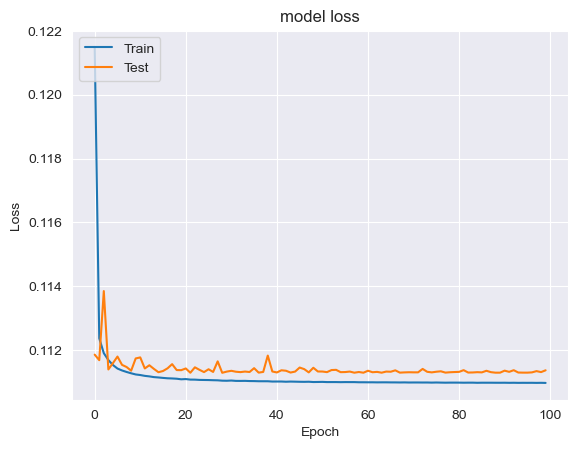

In [94]:
plot_his(history_12)

In [95]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1114 - rmse: 0.2131 - mae: 0.1114 - mse: 0.0454 - mape: 29.2022


[0.11137007921934128,
 0.21309110522270203,
 0.11137007921934128,
 0.045407816767692566,
 29.20222282409668]

In [96]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [97]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1653.3862


In [ ]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


In [98]:
model_1.save('Saved_models/model_1_Energyesti.h5')

In [99]:
model_2.save('Saved_models/model_2_Energyesti.h5')

In [100]:
model_3.save('Saved_models/model_3_Energyesti.h5')

In [101]:
model_4.save('Saved_models/model_4_Energyesti.h5')

In [102]:
model_5.save('Saved_models/model_5_Energyesti.h5')

In [103]:
model_6.save('Saved_models/model_6_Energyesti.h5')

In [104]:
model_7.save('Saved_models/model_7_Energyesti.h5')

In [105]:
model_8.save('Saved_models/model_8_Energyesti.h5')

In [106]:
model_9.save('Saved_models/model_9_Energyesti.h5')

In [107]:
model_10.save('Saved_models/model_10_Energyesti.h5')

In [108]:
model_11.save('Saved_models/model_11_Energyesti.h5')

In [111]:
model_12.save('Saved_models/model_12_Energyesti.h5')

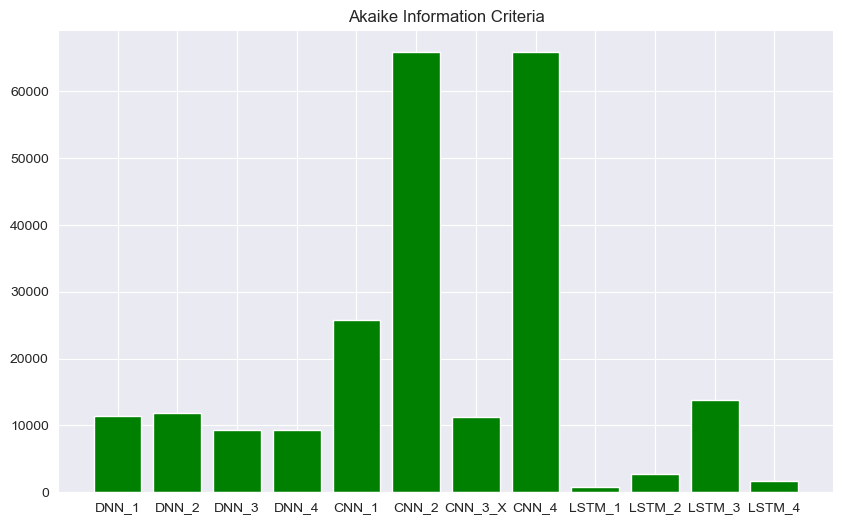

In [112]:
AIC_score = { 'DNN_1':11477.36,'DNN_2':11817.26,'DNN_3':9277.26,'DNN_4':9277.26,'CNN_1':25717.27,
              'CNN_2':65857.26,'CNN_3_X':11217.26,'CNN_4':65857.26,'LSTM_1':777.26,
             'LSTM_2':2777.26, 'LSTM_3':13777.27, 'LSTM_4':1653.38 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()